In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Exploratory data analysis
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

In [5]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

booking_complete
0    42522
1     7478
Name: count, dtype: int64

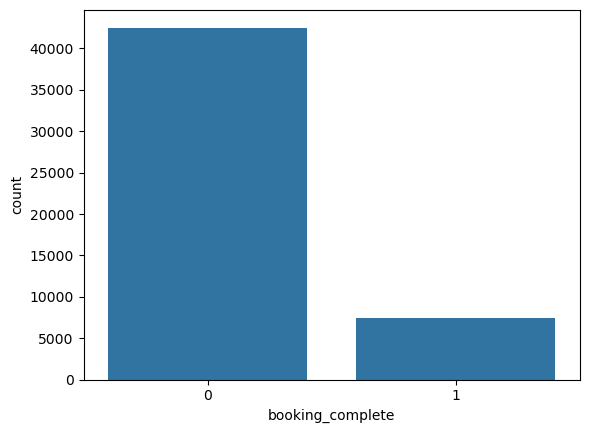

In [9]:
sns.countplot(x= df['booking_complete'])
df['booking_complete'].value_counts()

In [11]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [13]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [17]:
print(df.columns)

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [23]:
#Feature engineering
df['is_weekend_flight'] = df['flight_day'].isin(['Saturday','Sunday']).astype(int)
df['has_preferences'] = df[['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']].sum(axis=1)>0
df['has_preferences'] = df['has_preferences'].astype(int)

In [25]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend_flight,has_preferences
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0,1
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0,1
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0,1
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,0,1


In [27]:
df = pd.get_dummies(df, columns=[
    'sales_channel', 'trip_type', 'flight_day',
    'route', 'booking_origin'
], drop_first=True)


In [29]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend_flight,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,1,0,0,5.52,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,0,0,0,5.52,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,1,1,0,5.52,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,0,0,1,5.52,0,0,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,1,0,1,5.52,0,0,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# Splitting the data into training and test sets

from sklearn.model_selection import train_test_split

#define features(X) and target(y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

#split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
#model selection
from sklearn.ensemble import RandomForestClassifier

#initialize the model
model = RandomForestClassifier(random_state=42)

#fit the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.52      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000

ROC AUC Score: 0.7866520746098211


In [40]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the model (e.g., RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Perform K-Fold Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Output the results
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", np.mean(cv_scores))


Cross-Validation Accuracy Scores:  [0.8485 0.7722 0.7229 0.5468 0.7591]
Mean Cross-Validation Accuracy:  0.7299


In [42]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

# Define custom scoring functions
precision = make_scorer(precision_score)
recall = make_scorer(recall_score)
f1 = make_scorer(f1_score)
roc_auc = make_scorer(roc_auc_score)

# Evaluate using cross-validation for multiple metrics
precision_scores = cross_val_score(model, X, y, cv=5, scoring=precision)
recall_scores = cross_val_score(model, X, y, cv=5, scoring=recall)
f1_scores = cross_val_score(model, X, y, cv=5, scoring=f1)
roc_auc_scores = cross_val_score(model, X, y, cv=5, scoring=roc_auc)

# Output the results
print("Precision Scores (CV): ", precision_scores)
print("Recall Scores (CV): ", recall_scores)
print("F1-Score Scores (CV): ", f1_scores)
print("ROC AUC Scores (CV): ", roc_auc_scores)

# Mean values
print("Mean Precision: ", np.mean(precision_scores))
print("Mean Recall: ", np.mean(recall_scores))
print("Mean F1-Score: ", np.mean(f1_scores))
print("Mean ROC AUC: ", np.mean(roc_auc_scores))


Precision Scores (CV):  [0.33870968 0.12961211 0.         0.01189711 0.29259428]
Recall Scores (CV):  [0.01404682 0.0916388  0.         0.02473262 0.43048128]
F1-Score Scores (CV):  [0.02697495 0.10736677 0.         0.016066   0.34839059]
ROC AUC Scores (CV):  [0.50461306 0.49173357 0.42503528 0.33168663 0.62369549]
Mean Precision:  0.1545626337205271
Mean Recall:  0.1121799044944825
Mean F1-Score:  0.09975966216423045
Mean ROC AUC:  0.4753528049325356


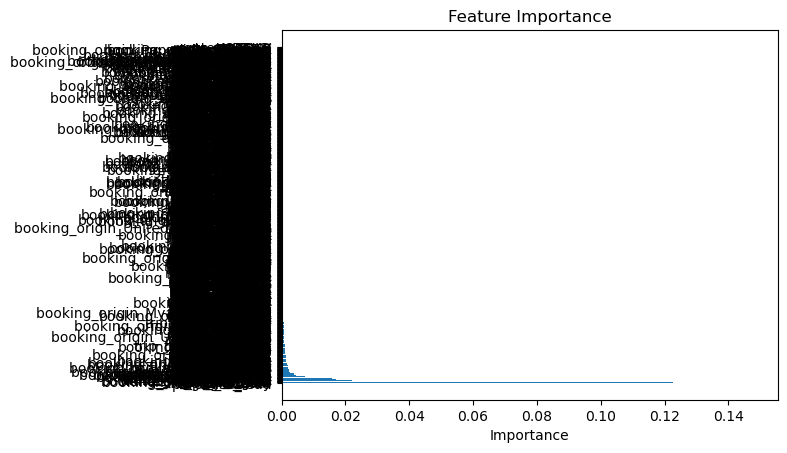

In [46]:
import matplotlib.pyplot as plt

# Fit the model
model.fit(X_train, y_train)

# Get feature importance
feature_importances = model.feature_importances_

# Create a DataFrame for easy visualization
import pandas as pd
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


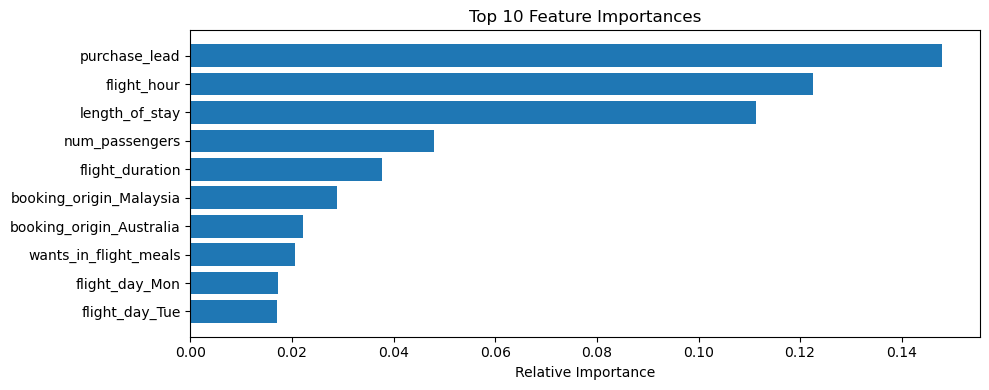

In [54]:
top_n = 10
top_features = importance_df.head(top_n)

plt.figure(figsize=(10, top_n * 0.4))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Relative Importance')
plt.title(f'Top {top_n} Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
